In [1]:
 %load_ext rpy2.ipython

In [ ]:
%%R
install.packages("tidymodels")


# Class 09 - Intro to Programming for Supervised Learning in R and Python

Sources for slides
- https://www.statlearning.com/resources-python
- https://github.com/intro-stat-learning/ISLP_labs/blob/stable/Ch04-classification-lab.ipynb
- https://cs229.stanford.edu/syllabus-spring2022.html


## Overview

`Statistical learning` refers to a vast set of tools for understanding data. These tools can be classifed as supervised or unsupervised. Broadly speaking,
`supervised` statistical learning involves building a statistical model for predicting, or estimating, an output based on one or more inputs. Problems of
this nature occur in felds as diverse as business, medicine, astrophysics, and
public policy. With `unsupervised` statistical learning, there are inputs but
no supervising output; nevertheless we can learn relationships and struc-
ture from such data. To provide an illustration of some applications of
statistical learning, we briefy discuss three real-world data sets that are
considered in this book.

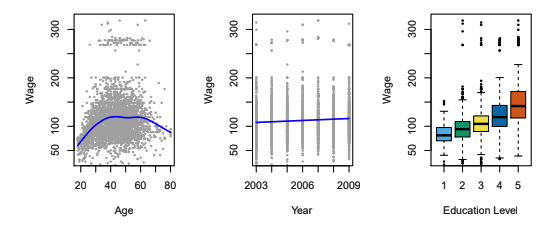


We examine a number of factors that relate to wages for a group of
men from the Atlantic region of the United States. In particular, we wish
to understand the association between an employee’s `age` and `education`, as
well as the calendar year, on his `wage`. The Wage data involves predicting a continuous or quantitative output value. This is often referred to as a `regression` problem. However, in certain cases we may instead wish to predict a non-numerical value—that is, a categorical or qualitative output- which is referred to as a `classification problem`. For example, in Chapter 4 we examine a stock market data set that contains the daily movements in the Standard & Poor’s 500 (S&P) stock index over a 5-year period between 2001 and 2005. The goal is to predict whether the index will increase or decrease on a given day, using the past 5 days’ percentage changes in the index.

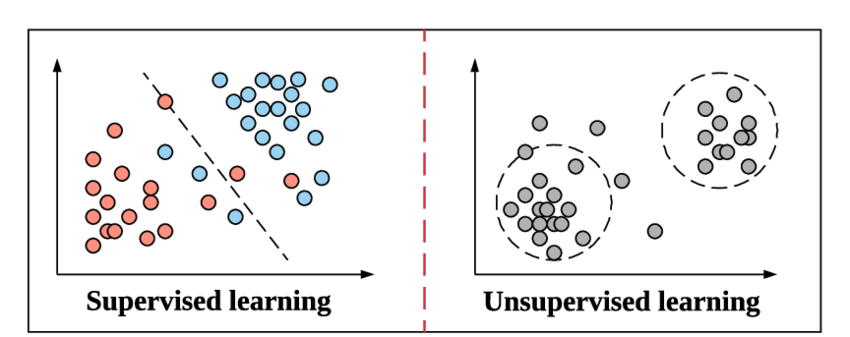

## Linear and Non-Linear Models

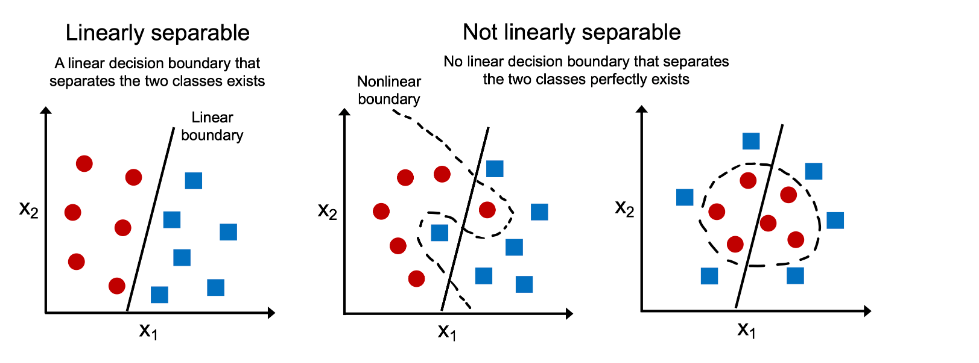

### Linear Models (include but not limited to...)
- Linear Regression (Simple Linear Regression, Multiple Linear Regression)
- Logistic Regression

### Non-Linear Models (include but not limited to...)
- Classification and Regression Trees
- XGBoost
- Neural Networks

### Important Libraries
Python
- Statsmodels
- SkLearn
- Tensorflow (not covered)
- Keras (not covered)
- PyTorch (not covered)


R
- Base R (lm, glm)
- CARAT
- RandomForest
- Tidymodels


## Key Points for Today

- `Classification` v. `Regression`
- `Supervised` v. `Unsupervised`
- Evaluation of results
- Training and testing data
- Various models... `Linear Regression`, `Logistic Regression`, `CARTs`




### `Key Points` to consider when approaching a problem.
1. Is my problem a regression or a classification?
  - This will change what algorithm I use
  - and how I evaluate results
2. Do I have numeric, or categorical (further nominal or ordinal) data?
 - This will change how I transform my data

## About the Dataset for Today
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
import pandas as pd

In [5]:
diab = pd.read_csv("pima-indians-diabetes.csv", header=0)
diab.columns = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
'''
Fields description follow:
preg = Number of times pregnant
plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
pres = Diastolic blood pressure (mm Hg)
skin = Triceps skin fold thickness (mm)
test = 2-Hour serum insulin (mu U/ml)
mass = Body mass index (weight in kg/(height in m)^2)
pedi = Diabetes pedigree function
age = Age (years)
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

source: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv
'''
print(diab.shape)
diab.head()

(767, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Linear Models

`Problem 1:` Are we able to predict `plasma` levels, using these diagnostic tests?

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt


### Linear Regression

#### Python - Stats Models v. Sci-Kit Learn

##### `Simple Linear Regression`

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

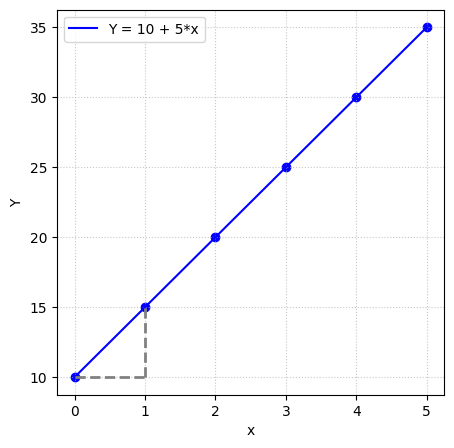

In [8]:
x = [0, 1, 2, 3, 4, 5]
y = [10, 15, 20, 25, 30, 35]

plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(x, y, color='b')
ax.set_xlabel('x')
ax.set_ylabel('Y')
ax.plot(x[0:6], y[0:6],color='blue', label = "Y = 10 + 5*x")
plt.grid(alpha=.7,linestyle=':')
plt.hlines(y=10, xmin=0, xmax=1, colors='gray', linestyles='--', lw=2)
plt.vlines(ymin=10, ymax=15, x=1, colors='gray', linestyles='--', lw=2)
plt.legend()

<Axes: >

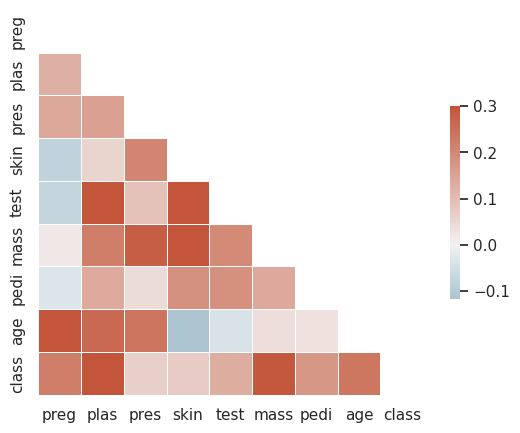

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
# Compute the correlation matrix
corr = diab.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

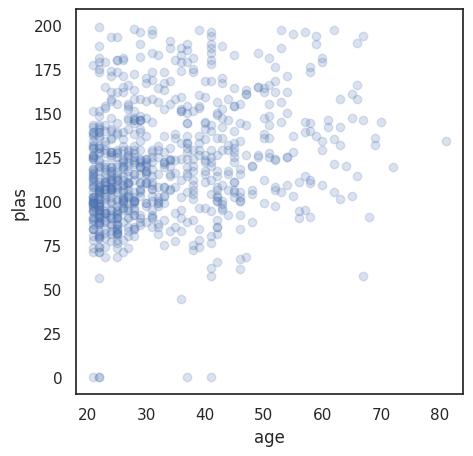

In [10]:


#-------------#
# SCATTERPLOT #
#-------------#

### Correlation
print(diab[["age", "plas"]].corr())

### Plot
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["age"], diab["plas"], color='b', alpha=0.20)
ax.set_xlabel('age')
ax.set_ylabel('plas')
plt.show()

### Python: Statsmodels

In [12]:
### Statsmodel (No Intercept)
smOLS = sm.OLS(diab["plas"], diab["age"]).fit()
print(smOLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                   plas   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              5221.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:54:49   Log-Likelihood:                         -4003.2
No. Observations:                 767   AIC:                                      8008.
Df Residuals:                     766   BIC:                                      8013.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

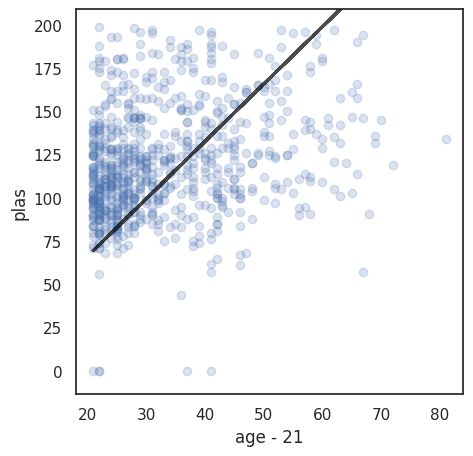

In [13]:
plt.figure(figsize=(5, 5))

ax = plt.axes()
ax.scatter(diab["age"], diab["plas"], color='b', alpha=0.20)
ax.plot(diab["age"], smOLS.predict(), color='black', alpha=0.70, linewidth=2)
ax.set_xlabel('age - 21')
ax.set_ylabel('plas')
plt.ylim(top=diab['plas'].max()+10)
plt.show()

In [14]:
### Statsmodel (With and Without Intercept)
smOLS_int = sm.OLS(diab["plas"], sm.add_constant(diab["age"])).fit()
print(smOLS_int.summary())


                            OLS Regression Results                            
Dep. Variable:                   plas   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.52e-13
Time:                        20:56:50   Log-Likelihood:                -3718.2
No. Observations:                 767   AIC:                             7440.
Df Residuals:                     765   BIC:                             7450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.1400      3.345     29.042      0.0

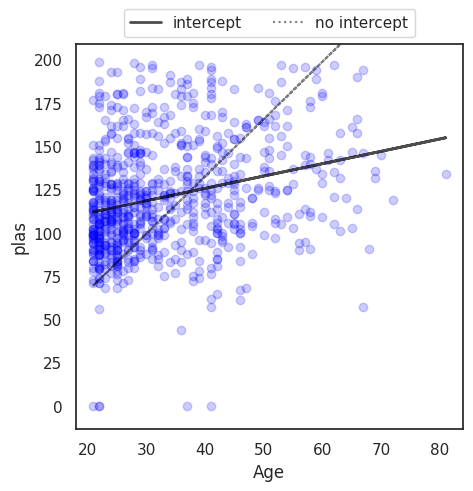

In [15]:
#-- Relationship b/t age, plasma with and without an intercept
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["age"], diab["plas"], color='blue', alpha=0.20)
ax.plot(diab["age"], smOLS_int.predict(), color='black', label="intercept", alpha=0.70, linewidth=2)
ax.plot(diab["age"], smOLS.predict(), color='black', label="no intercept",  linestyle=":", alpha=0.50, linewidth=1.5)
ax.set_xlabel('Age')
ax.set_ylabel('plas')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=False, ncol=2)
plt.ylim(top=diab['plas'].max()+10)
plt.show()

### Python: SKLearn

In [17]:
#-- SkLearn
from sklearn.linear_model import LinearRegression

In [18]:
#-- The Sklearn way!
sklOLS = LinearRegression()
model = sklOLS.fit(diab[["age"]], diab["plas"])

print('Intercept: ', sklOLS.intercept_)
print('Coefficient: ', sklOLS.coef_)

Intercept:  97.14003014845233
Coefficient:  [0.71402319]


##### `Multiple Linear Regression`

Another thing we have not done is split our data between `training` and `testing` data. This is very important to make sure to evaluate your model on unseen data.

e.g. It would be unimpressive to score well on a test when you have seen all of the exam answers.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#-- What if we add additional columns?
indep_vars = [i for i in diab.columns if i != 'plas']
dep_var = 'plas'
X = diab[indep_vars]
y = diab[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=7656)


In [21]:

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train)) #-- R2
print(model.score(X_test, y_test)) #-- R2

0.34521497555284364
0.3218916810844702


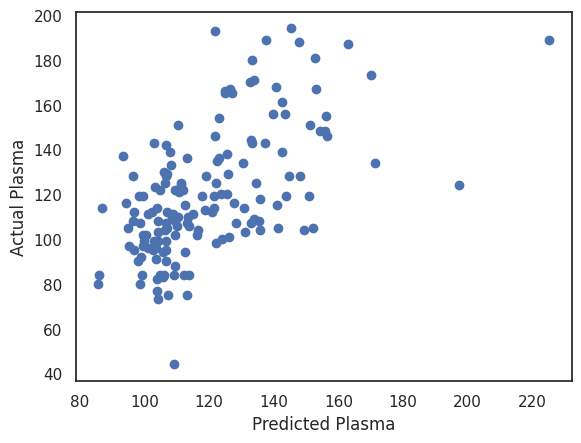

In [22]:
#-- How are we doing? Better?
plt.scatter(model.predict(X_test), y_test)
plt.xlabel("Predicted Plasma")
plt.ylabel("Actual Plasma")
plt.show()

In [23]:
X_train.head()

,preg,pres,skin,test,mass,pedi,age,class
726,0,84,26,0,32.4,0.433,22,0
210,0,85,54,0,42.8,0.375,24,0
598,1,38,18,120,23.1,0.407,26,0
541,10,85,32,0,34.9,0.825,56,1
430,3,74,16,85,30.4,0.551,38,0


In [24]:
#------ Back to Statsmodels!
smOLS_int = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(smOLS_int.summary())

                            OLS Regression Results                            
Dep. Variable:                   plas   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     39.81
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           5.69e-51
Time:                        21:04:14   Log-Likelihood:                -2879.6
No. Observations:                 613   AIC:                             5777.
Df Residuals:                     604   BIC:                             5817.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4036      6.192     12.178      0.0

#### R

In [25]:
%%R
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [26]:
%%R
diab <- read_csv("pima-indians-diabetes.csv")
colnames(diab) = c("preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class")
head(diab)

Rows: 767 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): 6, 148, 72, 35, 0, 33.6, 0.627, 50, 1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 9
   preg  plas  pres  skin  test  mass  pedi   age class
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1     1    85    66    29     0  26.6 0.351    31     0
2     8   183    64     0     0  23.3 0.672    32     1
3     1    89    66    23    94  28.1 0.167    21     0
4     0   137    40    35   168  43.1 2.29     33     1
5     5   116    74     0     0  25.6 0.201    30     0
6     3    78    50    32    88  31   0.248    26     1


In [27]:
%%R
lm.fit <- lm(diab$plas ~ diab$age)
summary(lm.fit)


Call:
lm(formula = diab$plas ~ diab$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-126.415  -20.843   -3.135   18.368   86.151 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.14003    3.34484  29.042  < 2e-16 ***
diab$age     0.71402    0.09493   7.521 1.52e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.88 on 765 degrees of freedom
Multiple R-squared:  0.06886,	Adjusted R-squared:  0.06764 
F-statistic: 56.57 on 1 and 765 DF,  p-value: 1.521e-13



In [28]:
%%R
print(names(lm.fit))
print(coef(lm.fit))

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        
(Intercept)    diab$age 
 97.1400301   0.7140232 


In [29]:
%%R
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(diab), replace=TRUE, prob=c(0.7,0.3))
train  <- diab[sample, ]
test   <- diab[!sample, ]

In [30]:
%%R
lm.fit <- lm(train$plas ~ train$age)
summary(lm.fit)


Call:
lm(formula = train$plas ~ train$age)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.985  -21.020   -3.619   19.676   85.257 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  99.5673     4.0423  24.631  < 2e-16 ***
train$age     0.6443     0.1136   5.674 2.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.88 on 538 degrees of freedom
Multiple R-squared:  0.05646,	Adjusted R-squared:  0.0547 
F-statistic: 32.19 on 1 and 538 DF,  p-value: 2.285e-08



In [31]:
%%R
mod <- lm(plas ~ age + preg + pres + skin + test + mass +  pedi, data=train)
summary(mod)


Call:
lm(formula = plas ~ age + preg + pres + skin + test + mass + 
    pedi, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.151  -18.041   -1.808   15.892   89.119 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 66.90453    6.68524  10.008  < 2e-16 ***
age          0.49153    0.12350   3.980 7.85e-05 ***
preg         0.44585    0.42492   1.049   0.2945    
pres         0.05558    0.07353   0.756   0.4500    
skin        -0.41400    0.09554  -4.333 1.76e-05 ***
test         0.10616    0.01129   9.402  < 2e-16 ***
mass         0.85707    0.17374   4.933 1.08e-06 ***
pedi         9.88562    3.85696   2.563   0.0106 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.49 on 532 degrees of freedom
Multiple R-squared:  0.2551,	Adjusted R-squared:  0.2453 
F-statistic: 26.03 on 7 and 532 DF,  p-value: < 2.2e-16



In [32]:
%%R
test$preds <- predict(mod, test)


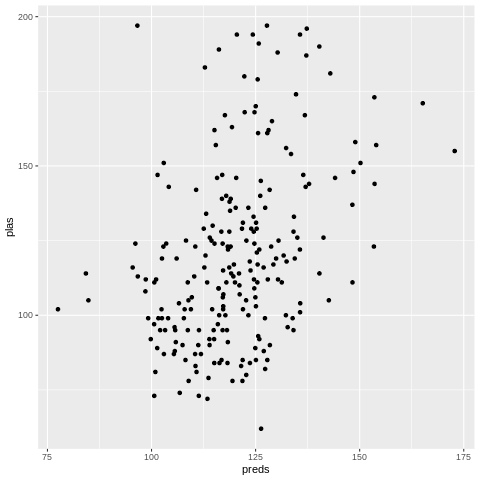

In [33]:
%%R
library(ggplot2)
ggplot(test, aes(x=preds, y=plas)) +
       geom_point()

### Logistic Regression

`Problem 2:` Are we able to predict `diabetes` levels, using these diagnostic tests?

In [34]:
indep_vars = [i for i in diab.columns if i != 'class']
dep_var = 'class'
X = diab[indep_vars]
y = diab[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)


In [35]:
import numpy as np

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7846655791190864
0.7792207792207793


In [37]:
preds = model.predict_proba(X_test)
preds = np.array([i[1] for i in preds])

In [38]:
preds[0:5]


array([0.71165151, 0.29278791, 0.70535251, 0.37348408, 0.24994237])

#### Evaluating a Binary Classification Model with Probabilities

https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/


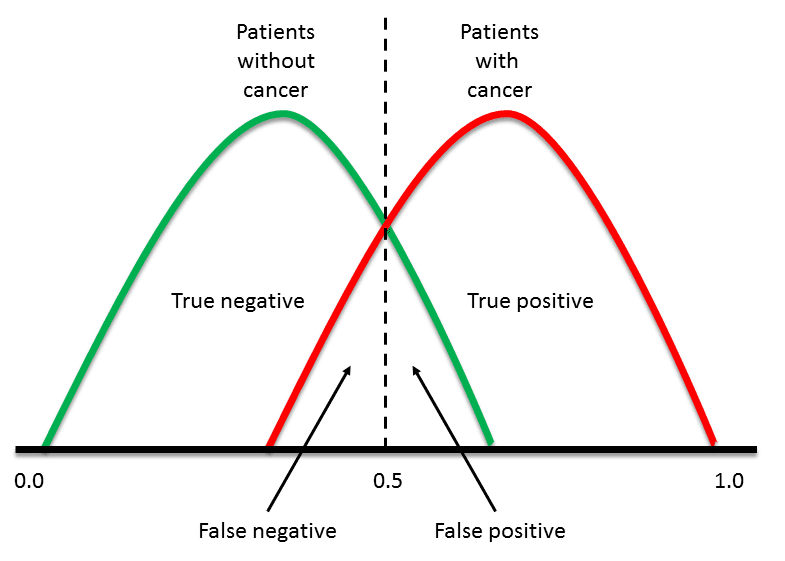

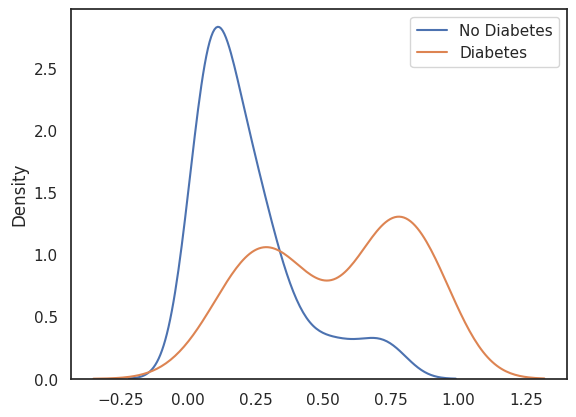

In [39]:
import seaborn as sns

sns.kdeplot(preds[y_test==0],  label="No Diabetes")
sns.kdeplot(preds[y_test==1],  label="Diabetes")
plt.legend()
plt.show()

Here is an alternative way of visualizing the relationships between probabilities, predictions and evaluating your model

<Axes: ylabel='preds'>

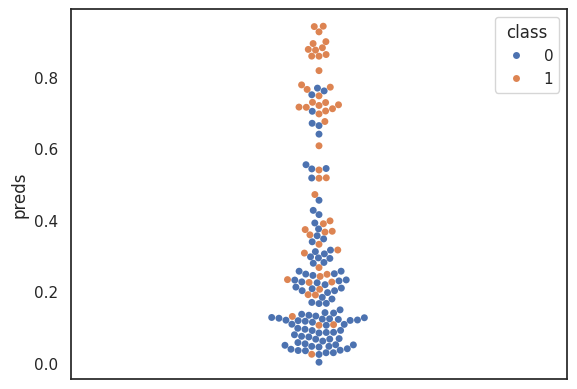

In [40]:
preds_df = pd.DataFrame({"class": y_test.tolist(), "preds": preds})
sns.swarmplot(data=preds_df,  y="preds", hue="class")


In [41]:
%%R
mod <- glm(class ~ age + preg + pres + plas + skin + test + mass +  pedi, data=train)
summary(mod)


Call:
glm(formula = class ~ age + preg + pres + plas + skin + test + 
    mass + pedi, data = train)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.7600032  0.1016600  -7.476 3.19e-13 ***
age          0.0020347  0.0017483   1.164 0.245009    
preg         0.0222643  0.0059338   3.752 0.000195 ***
pres        -0.0030712  0.0010263  -2.992 0.002896 ** 
plas         0.0059357  0.0006048   9.814  < 2e-16 ***
skin        -0.0007232  0.0013562  -0.533 0.594082    
test        -0.0001362  0.0001701  -0.801 0.423592    
mass         0.0136714  0.0024784   5.516 5.42e-08 ***
pedi         0.0713966  0.0541360   1.319 0.187792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1579103)

    Null deviance: 121.30  on 539  degrees of freedom
Residual deviance:  83.85  on 531  degrees of freedom
AIC: 546.68

Number of Fisher Scoring iterations: 2



In [42]:
%%R
preds <- predict(mod, test)

In [ ]:
%%R
preds

## Non-Linear Models
e.g.
1. CARTs (Classification and Regression Trees) e.g. Decision Trees
2. Random Forest

### Decision Trees: A brief overview

### Demo... Building a Decision Tree from Scratch to predict if a customer will respond to marketing flier

### An overview

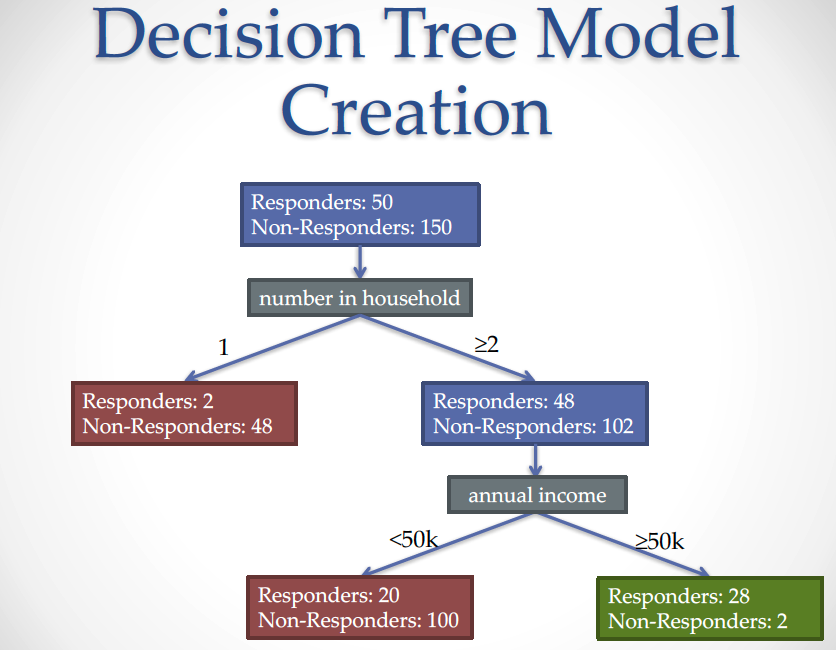

`Classification Trees`: Binary or Categorical Target
`Regression Trees`: Continuous Target

### How they work... Starting with a `Classification Tree`
1. Recursively partition the data to find most "pure" splits. Usually measured by entropy or Gini
2. Keep splitting until tunable thresholds are met
  * Tree reaches a certain depth
  * Leaf has only n samples left
  * Leaf is totally pure

 `Regression Trees` Work the exact same as Classification Trees, except each leaf is a seperate linear regression

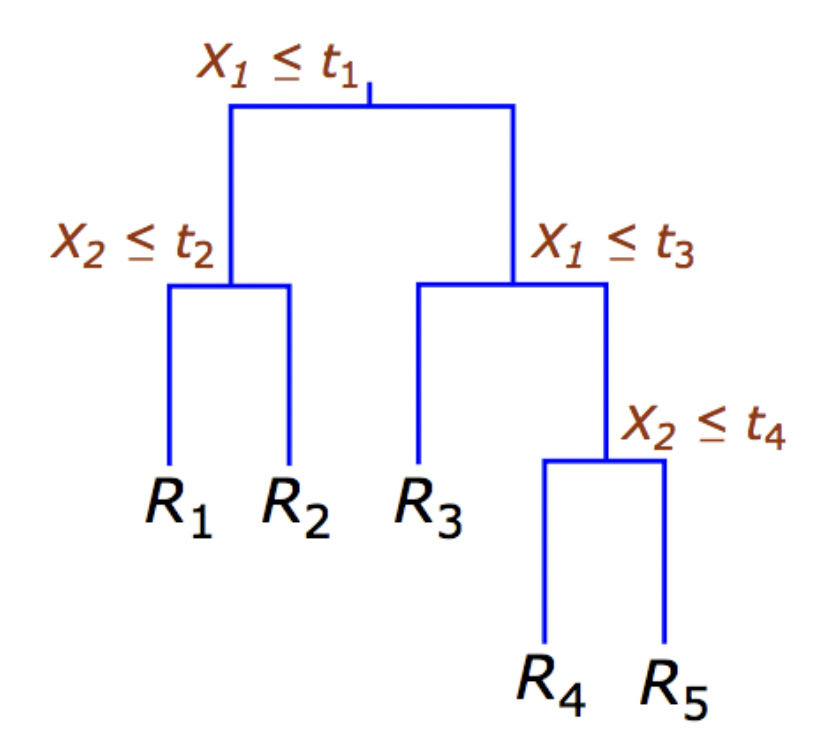

Drawbacks of CARTs
1. Overfit to data and may not generalize well
2. Algorithm is locally greedy, only considers best split at the time

Strengths
1. Can handle missing data
2. Great with categorical or continuous data
3. Fast
4. Easy to understand and explain

### Lets see CARTs in practice

In [44]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7716150081566069
0.7792207792207793


In [48]:
y_train.value_counts()

,count
class,
0,399
1,214


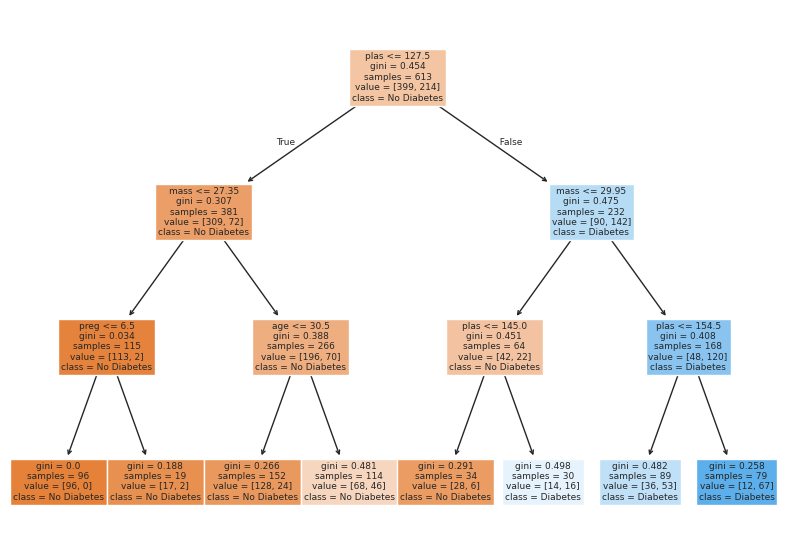

In [49]:
from sklearn import tree
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = ["No Diabetes", "Diabetes"], filled = True)
plt.show()

In [50]:
preds = model.predict_proba(X_test)
preds = np.array([i[1] for i in preds])

In [51]:
preds[0:5]

array([0.84810127, 0.17647059, 0.84810127, 0.40350877, 0.15789474])

<ipython-input-52-c6feb02e9a73>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[y_test==0], hist=False, kde=True, label="No Diabetes")
<ipython-input-52-c6feb02e9a73>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[y_test==1], hist=False, kde=True, label="Diabetes

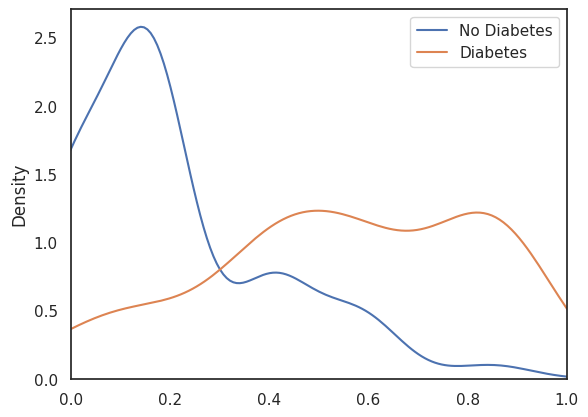

In [52]:
import seaborn as sns

sns.distplot(preds[y_test==0], hist=False, kde=True, label="No Diabetes")
sns.distplot(preds[y_test==1], hist=False, kde=True, label="Diabetes")
plt.legend()
plt.xlim(0, 1)
plt.show()

In [ ]:
%%R
library("tidymodels")
library("tidyr")
library("tidyverse")

In [ ]:
%%R
# Create a decision tree model specification
tree_spec <- decision_tree() %>%
 set_engine("rpart") %>%
 set_mode("classification")

In [ ]:
%%R
train$class <- as.factor(train$class)
test$class <- as.factor(test$class)

In [ ]:
%%R
tree_fit <- tree_spec %>%
 fit(class ~ age + preg + pres + plas + skin + test + mass +  pedi, data=train)

In [ ]:
%%R
# Make predictions on the testing data
predictions <- tree_fit %>%
 predict(test)

In [ ]:
%%R
head(predictions)

## What about categorical data? What is it and what to do with it?

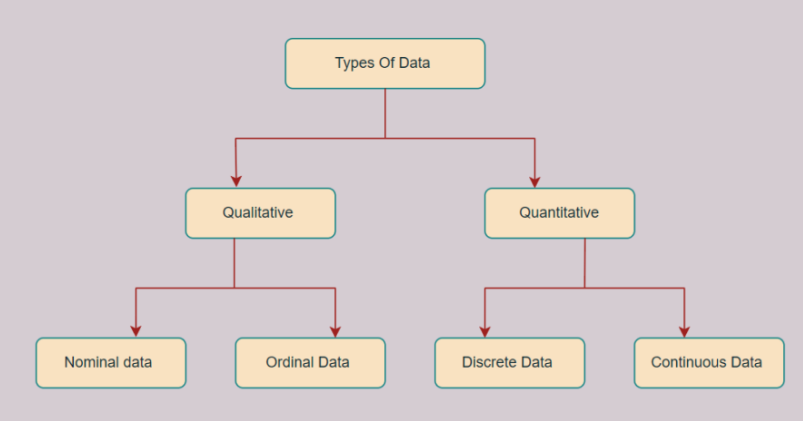



*   `Continuous Data`: Numeric and unbounded data e.g Speed of a pitch
*   `Ordinal Data`: Ordered categorical data e.g. Grades
*   `Nominal Data`: Unordered categorical data e.g. car color



### Dummy Variables

In [53]:
df = pd.DataFrame({
    "income": [100,86, 101, 75, 101, 100],
    "gender": ["f","m","f","m","m","f"],
    "city": ["WAS","WAS","WAS","WAS","ATL","NYC"],
})
df.head()

,income,gender,city
0,100,f,WAS
1,86,m,WAS
2,101,f,WAS
3,75,m,WAS
4,101,m,ATL


In [55]:
pd.get_dummies(df,columns=["gender","city"], drop_first=True)

,income,gender_m,city_NYC,city_WAS
0,100,False,False,True
1,86,True,False,True
2,101,False,False,True
3,75,True,False,True
4,101,True,False,False
5,100,False,True,False


## Evaluation of Classification and Regression Problems

### Common Metrics for Regression Problems
- R-Squared
- Mean Absolute Error (MAE)
- Root mean squared error (RMSE)
- Mean absolute percent error (MAPE)

### Common Metrics for Classification Problems
- Accuracy
- Precision
- Recall
- F1 Score
- Area under the Curve (ROC)

### MAE, RMSE

In [56]:
import pandas as pd
diab = pd.read_csv("pima-indians-diabetes.csv", header=0)
diab.columns = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]

In [57]:
indep_vars = [i for i in diab.columns if i != 'plas']
dep_var = 'plas'
X = diab[indep_vars]
y = diab[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)


In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.3773105322529795
0.23478761822859884


In [59]:
X_test["preds"] = model.predict(X_test)
X_test['actual_plasma'] = y_test
X_test.head()

,preg,pres,skin,test,mass,pedi,age,class,preds,actual_plasma
661,8,106,46,231,37.6,0.165,43,1,173.208333,167
122,5,80,0,0,26.8,0.186,69,0,124.320755,132
113,7,54,32,175,30.5,0.588,39,1,136.140541,160
14,7,0,0,0,30.0,0.484,32,1,136.140541,100
529,2,60,18,106,29.8,0.717,22,0,101.454545,122


In [61]:
X_test["Error"] = X_test['preds'] - X_test['actual_plasma']
X_test["MAE"] = X_test["Error"].abs()
X_test["RMSE"] = X_test["Error"] ** 2

print("MAE", X_test["MAE"].mean())
print("RMSE", (X_test["RMSE"].mean())**(1/2))
X_test.head()

MAE 21.116897902305457
RMSE 27.75742750653539


,preg,pres,skin,test,mass,pedi,age,class,preds,actual_plasma,Error,MAE,RMSE
661,8,106,46,231,37.6,0.165,43,1,173.208333,167,6.208333,6.208333,38.543403
122,5,80,0,0,26.8,0.186,69,0,124.320755,132,-7.679245,7.679245,58.970808
113,7,54,32,175,30.5,0.588,39,1,136.140541,160,-23.859459,23.859459,569.273806
14,7,0,0,0,30.0,0.484,32,1,136.140541,100,36.140541,36.140541,1306.138671
529,2,60,18,106,29.8,0.717,22,0,101.454545,122,-20.545455,20.545455,422.115702


### Precision and Recall
https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

#### Recall, or true positive rate
The `true positive rate (TPR)`, or the proportion of all actual positives that were classified correctly as positives, is also known as `recall`.
$$
  Sensitivity\ or\ Recall\ or\ (TPR) = \frac{Correctly\ classified\ actual\ positives}{All\ actual\ positives }\ = \frac{TP}{TP + FN}
$$

#### False positive rate
The `false positive rate (FPR)` is the proportion of all actual negatives that were classified incorrectly as positives, also known as the probability of false alarm. It is mathematically defined as:
$$
  Specificity\ or\ FPR = \frac{Inorrectly\ classified\ actual\ negatives}{All\ actual\ negatives }\ = \frac{FP}{FP + TN}
$$

#### Precision
`Precision` is the proportion of all the model's positive classifications that are actually positive. It can be interpreted as, "when you predict 'yes', how often am I right?".
It is mathematically defined as:
$$
  Precision = \frac{Correctly\ classified\ actual\ positives}{All\ predicted\ positives }\ = \frac{TP}{TP + FP}
$$

In [62]:
indep_vars = [i for i in diab.columns if i != 'class']
dep_var = 'class'
X = diab[indep_vars]
y = diab[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)


In [63]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["True 0", "True 1"])
cm

,Predicted 0,Predicted 1
True 0,89,12
True 1,22,31


In [64]:
precision = cm.loc["True 1", "Predicted 1"] / cm["Predicted 1"].sum()
recall = cm.loc["True 1", "Predicted 1"] / cm.loc["True 1"].sum()
print("Recall: ", str(round(100*recall, 2))+"%")
print("Precision: ", str(round(100*precision, 2))+"%")

Recall:  58.49%
Precision:  72.09%


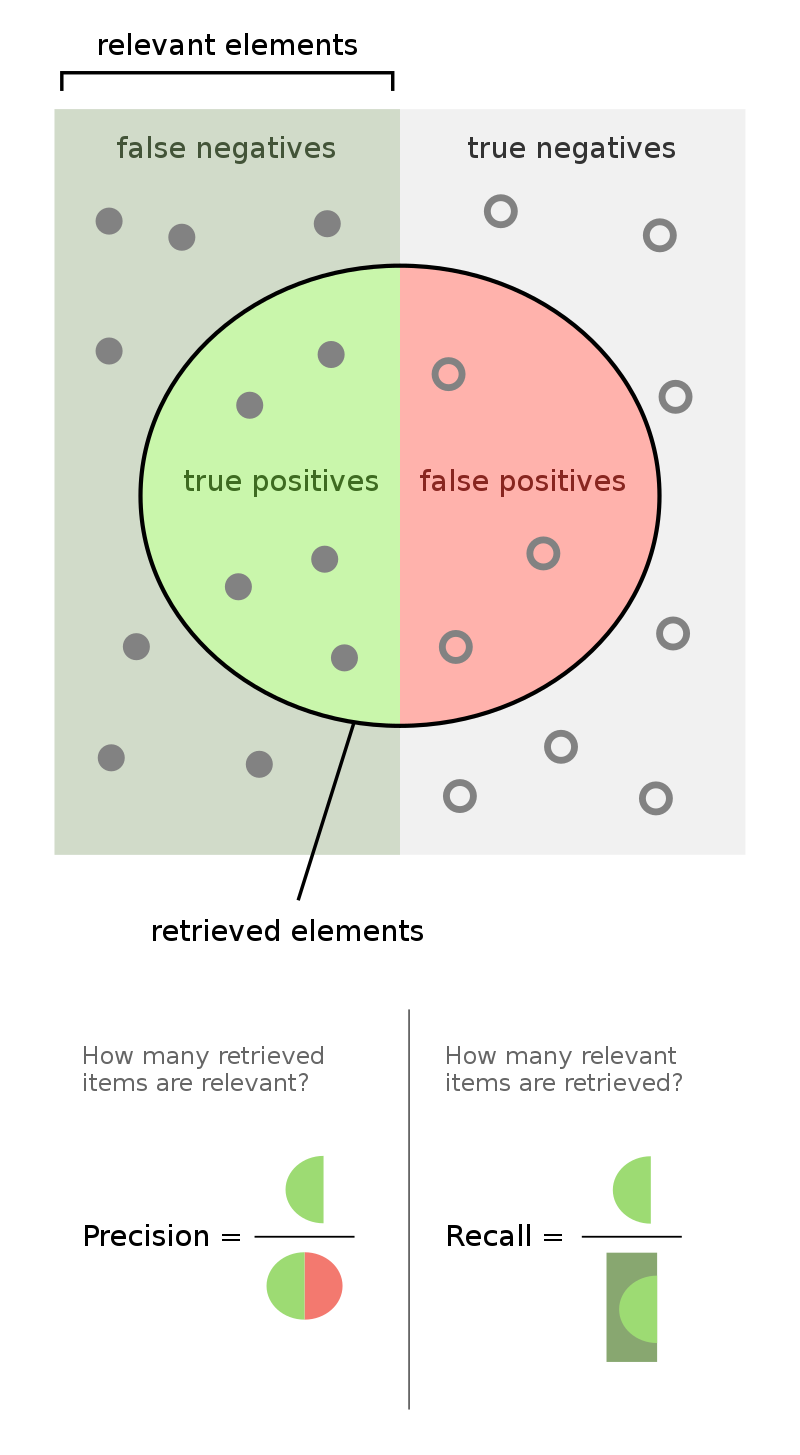

### Area Under the Curve and the ROC Curve

`ROC Curves` summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

`False Positive`. Predict an event when there was no event.
`False Negative`. Predict no event when in fact there was an event.
By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

For example, in a smog prediction system, we may be far more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when in fact it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn’t need to.

A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

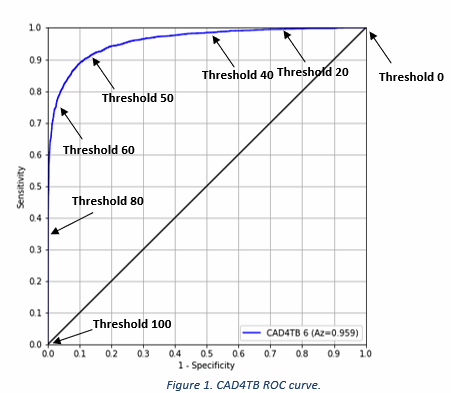

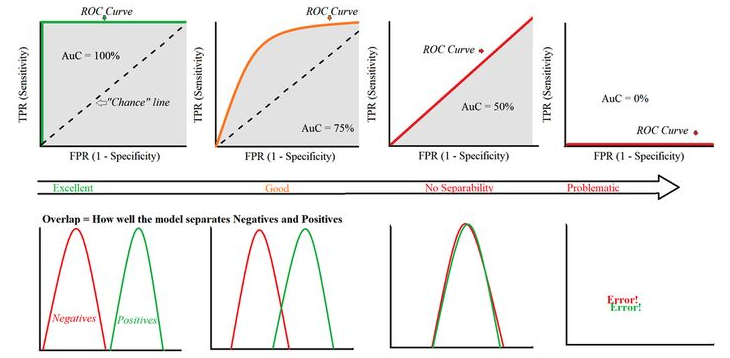

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.824


In [66]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

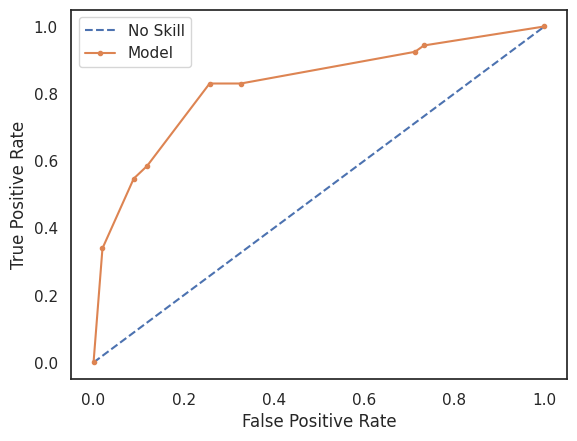

In [67]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()